#### STAGE1 Project
#### Alex Phoummalayvane, Tyssen Labombard, Ben Wiita
#### Fitting Curves to Data Project

1. Copy the Point2D struct from your homework and Chapter 17a into your module. This should be parametric
like was discussed in Chapter 17a. That is it should have a single type and if the two points that are passed in
are different types, you need to convert.

In [1]:
using Revise

In [2]:
using RecipesBase, Plots

In [3]:
includet("DataFit.jl")

In [4]:
using .DataFit

In [5]:
#test to make Point2D object when passing in ints 
point2D_test = Point2D(1, 4)

(1,4)

In [6]:
# test to see if it changes types inside Point2D object to both be floats 
point2D_test = Point2D(1, 4.0)

(1.0,4.0)

In [7]:
# test to see if Point2D object can be made when passing in floats 
point2D_test = Point2D(1.4, 4.0)

(1.4,4.0)

2. Create a new data type called XYData that stores a vector Point2D objects from your homework. You should
do this parametrically and the types of data for x and y should be the same and a subset of Real.


In [8]:
# test to create XYData object from passing in a vector of tuples 
test_vectorTuples = XYData([(1,2), (4,2), (6,7)])

[(1,2),(4,2),(6,7)]

In [9]:
vector_ypts_floats = [3.1, 3.2, 0.0, 0.1]

4-element Vector{Float64}:
 3.1
 3.2
 0.0
 0.1

In [10]:
vector_xpts_ints = [0, 4, 4, 0]

4-element Vector{Int64}:
 0
 4
 4
 0

In [11]:
#test for constructing XYData object from two vectors of same length but diff type
vector_diff_types = XYData(vector_xpts_ints, vector_ypts_floats)

[(0.0,3.1),(4.0,3.2),(4.0,0.0),(0.0,0.1)]

In [12]:
#example professor gave
#map((i,j)->i*j, [2, 5, 6], [3,5,9])

In [13]:
vector_xpts = [0, 4, 4, 0]

4-element Vector{Int64}:
 0
 4
 4
 0

In [14]:
vector_ypts = [3, 3, 0, 0]

4-element Vector{Int64}:
 3
 3
 0
 0

In [15]:
plot_test = XYData(vector_xpts, vector_ypts)

[(0,3),(4,3),(4,0),(0,0)]

2a. Create a default inner constructor that takes a vector of Point2D objects.


2b. Create a constructor that creates a new XYData object from two vectors of reals of the same length (each
vector should be the same subtype of real).

2c. Create a constructor that creates a new XYData object from a vector of tuples. Consider tuples of the
same and different types.


2d. Create a constructor that creates a new XYData object from two vectors of the same length but different
types (like integers and floats).

2e. Create a Base.show function that prints out the XYData in a nice way.

3.  Use a RecipesBase to develop a plot recipe for plotting XYData. Test it.


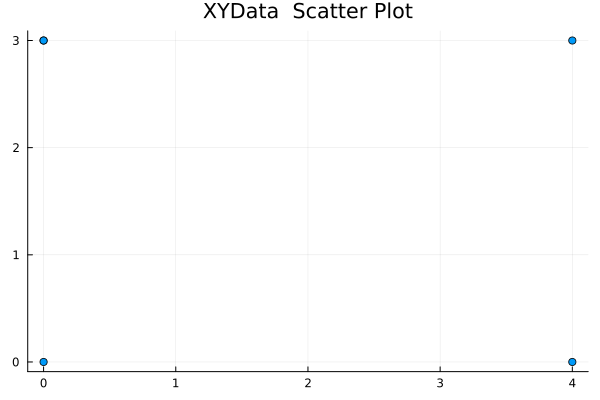

In [16]:
plot(plot_test)

4. Write a function called linearRegression that passes in a XYData object and return the least-squares line
(formulas in the Background section above) as either a named tuple or a new datatype.

In [17]:
v1 = [2,3,5,7,9]

5-element Vector{Int64}:
 2
 3
 5
 7
 9

In [18]:
v2 = [4,5,7,10,15]

5-element Vector{Int64}:
  4
  5
  7
 10
 15

In [19]:
d1 = XYData(v1,v2)

[(2,4),(3,5),(5,7),(7,10),(9,15)]

In [20]:
linearRegression(d1)

(1.5182926829268293, 0.30487804878048763)

5. Develop a test suite for this module and test the different constructor methods as well as for any errors that
may be thrown.

In [29]:
using LinearAlgebra

In [21]:
using Test

In [22]:
using Revise

In [23]:
includet("TestSuiteStage1.jl");

Test Summary: | Pass  Total  Time
Legal Point2D |    2      2  0.4s
Legal XYData: Error During Test at /Users/benwiita/Desktop/Current Semester/Scientific Computation/sci-comp-notebooks/Sci-Comp-and-Visual-Project/TestSuiteStage1.jl:10
  Got exception outside of a @test
  UndefVarError: argumentError not defined
  Stacktrace:
    [1] macro expansion
      @ ~/Desktop/Current Semester/Scientific Computation/sci-comp-notebooks/Sci-Comp-and-Visual-Project/TestSuiteStage1.jl:12 [inlined]
    [2] macro expansion
      @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Test/src/Test.jl:1357 [inlined]
    [3] top-level scope
      @ ~/Desktop/Current Semester/Scientific Computation/sci-comp-notebooks/Sci-Comp-and-Visual-Project/TestSuiteStage1.jl:11
    [4] eval
      @ ./boot.jl:368 [inlined]
    [5] process_source!(mod_exprs_sigs::OrderedCollections.OrderedDict{Module, OrderedCollections.OrderedDict{Revise.RelocatableExpr, Union{Nothing, Vector{Any}}}}, ex::Expr,

ERROR: Some tests did not pass: 1 passed, 0 failed, 1 errored, 0 broken.
Stacktrace:
 [1] finish(ts::Test.DefaultTestSet)
   @ Test /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Test/src/Test.jl:1092
 [2] macro expansion
   @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Test/src/Test.jl:1368 [inlined]
 [3] top-level scope
   @ ~/Desktop/Current Semester/Scientific Computation/sci-comp-notebooks/Sci-Comp-and-Visual-Project/TestSuiteStage1.jl:11
in expression starting at /Users/benwiita/Desktop/Current Semester/Scientific Computation/sci-comp-notebooks/Sci-Comp-and-Visual-Project/TestSuiteStage1.jl:10


6. Add documentation for all constructors and functions in the module.

# Stage 2

1. Enter the gradientDescentBB functions from the textbook. Add them to your module.

In [34]:
function gradientDescentBB(f::Function,x₀::Vector; max_steps = 100)
  local steps = 0
  local ∇f₀ = ForwardDiff.gradient(f,x₀)
  local x₁ = x₀ - 0.25 * ∇f₀ # need to start with a value for x₁
  while norm(∇f₀)> 1e-4 && steps < max_steps
    ∇f₁ = ForwardDiff.gradient(f,x₁)
    Δ∇f = ∇f₁-∇f₀
    x₂ = x₁ - abs(dot(x₁-x₀,Δ∇f))/norm(Δ∇f)^2*∇f₁
    x₀ = x₁
    x₁ = x₂
    ∇f₀ = ∇f₁
    steps += 1
  end
  @show steps
  steps < max_steps || throw(ErrorException("The number of steps has exceeded $max_steps"))
  x₁
end


gradientDescentBB (generic function with 1 method)

2. Write a function called bestFitLine that minimizes equation (1) for a given set of data using the Barzilai–Borwein gradient descent code in problem #1. The only input should be a XYData object and should return a
named tuple or a new datatype. Add the function to your module.

In [31]:
using ForwardDiff

In [32]:
f(x) = x[1]^2+x[2]^2

f (generic function with 1 method)

In [33]:
gradientDescent(f,[1,2])

steps = 30


2-element Vector{Float64}:
 9.313225746154785e-10
 1.862645149230957e-9

In [71]:
function bestFitLine(data::XYData)
    function S(c)
        a=c[1]
        b=c[2]
        sum(pt->(a*pt.x+b-pt.y)^2,data.vertices)
    end
    gradientDescentBB(S,[1,2])
end

bestFitLine (generic function with 1 method)

In [72]:
bestFitLine(d1)

steps = 5


2-element Vector{Float64}:
 1.5182926751961423
 0.3048780475772454